In [1]:
import cv2;
import numpy as np;
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import math
import ipywidgets as widgets

import sys

print("Python version %s / OpenCV version %s " %(sys.version,cv2.__version__))

Python version 3.11.8 (main, Feb 12 2024, 14:50:05) [GCC 13.2.1 20230801] / OpenCV version 4.9.0 


In [2]:
drive_path = ".."

#### Ejercicio 1: Transformaciones lineales de una imagen
Conociendo la ecuación general de una transformación lineal:
\begin{equation*}
    s = ar+c
\end{equation*}
con $r$: valor de entrada, $a$: factor de ganancia y $c$: offset, realice los siguientes ejercicios:
1. Implemente una LUT (Look-Up Table) del mapeo de entrada y salida.
2. Pruebe la rutina con diferentes juegos de coeficientes $a$ y $c$, sobre diversas imágenes, y muestre en una misma ventana la imagen original, el mapeo aplicado y la imagen obtenida.
3. Implemente el negativo de la imagen de entrada.
4. Genere diversas LUT con estiramientos y compresiones lineales por tramos de la entrada, y pruebe los resultados sobre diversas imágenes.
5. *(Opcional)*: genere una imagen binaria de 256x256 que simule los ejes cartesianos de la transformacion $r-s$, marcando la línea identidad. Capture dos puntos que marquen el final de los segmentos, y genere la LUT con una transformación que parta del origen, pase por los puntos marcados, y finalice en el punto (256x256). Pruebe la rutina con diversas imágenes.


In [3]:
def mostrar_imagen(img_path,):
  img = cv2.imread(drive_path+img_path)
  plt.figure()
  plt.imshow(img)
  plt.show()
  print("Alto, ancho y n_canales = %s" %str(img.shape))

img_list = ["/images/billete.jpg",
            "/images/chairs_oscura.jpg",
            "/images/bone.tif",
            "/images/botellas.tif",
            "/images/building.jpg",
            "/images/camaleon.tif",
            ]

img = img_list[1]
# mostrar_imagen(img)


In [4]:
# 1
def lineal_transformation(srcImg,a=1.0,c=0,lookUpTable=None):

    outImg = srcImg.copy()

    if lookUpTable is None:
        lookUpTable = np.empty((1,256), np.uint8)
        for i in range(256):
            lookUpTable[0,i] = np.clip(a*i+c,0,255)

    outImg = cv2.LUT(srcImg,lookUpTable)

    return outImg

def show_lineal_transformation(srcImg,outImg,grayscale=True):

    cmap_value = "gray" if grayscale else None

    fig = plt.figure(tight_layout=True)
    gs = gridspec.GridSpec(1,2)

    ax = fig.add_subplot(gs[0,0])
    ax.imshow(srcImg,cmap=cmap_value,vmin=0,vmax=255)

    ax = fig.add_subplot(gs[0,1])
    ax.imshow(outImg,cmap=cmap_value,vmin=0,vmax=255)


In [7]:
# 2 y 3
grayscale_chairs = False
grayscale_billete = True

# Imagen 1
if (grayscale_chairs):
    img_chairs = cv2.imread(drive_path+img_list[1],cv2.IMREAD_GRAYSCALE)
else:
    img_chairs = cv2.imread(drive_path+img_list[1])
    img_chairs = cv2.cvtColor(img_chairs,cv2.COLOR_BGR2RGB)

a1 = 2.0
c1 = 10

def interact_chairs(a,c):
    img_t1 = lineal_transformation(img_chairs,a,c)
    show_lineal_transformation(img_chairs,img_t1,grayscale=grayscale_chairs)

widgets.interact(
    interact_chairs,
    a=widgets.FloatSlider(value=a1,min=-1,max=3,step=0.01),
    c=widgets.IntSlider(value=c1,min=-255,max=255)
    )

# Imagen 2
if (grayscale_billete):
    img_billete = cv2.imread(drive_path+img_list[0],cv2.IMREAD_GRAYSCALE)
else:
    img_billete = cv2.imread(drive_path+img_list[0])
    img_billete= cv2.cvtColor(img_billete,cv2.COLOR_BGR2RGB)

def interact_billete(a,c):
    img_t2 = lineal_transformation(img_billete,a,c)
    show_lineal_transformation(img_billete,img_t2,grayscale=grayscale_billete)

widgets.interact(
    interact_billete,
    a=widgets.FloatSlider(value=-1,min=-1,max=3,step=0.01),
    c=widgets.IntSlider(value=255,min=-255,max=255)
    )


interactive(children=(FloatSlider(value=2.0, description='a', max=3.0, min=-1.0, step=0.01), IntSlider(value=1…

interactive(children=(FloatSlider(value=-1.0, description='a', max=3.0, min=-1.0, step=0.01), IntSlider(value=…

<function __main__.interact_billete(a, c)>

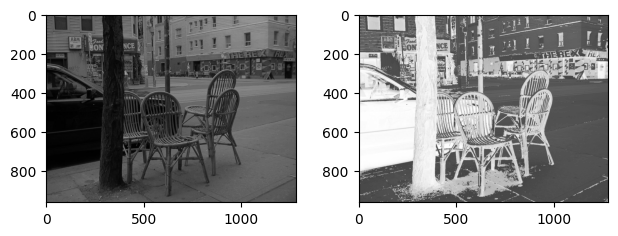

In [6]:
# 4
# Modificaciones por rango, es decir, los pixeles cuya intensidad se encuentre en un 
# intervalo [a,b] recibiran una transformacion, los que esten en otro intervalo (b,c] 
# recibiran otra, etc.

lookUpTable = np.empty((1,256), np.uint8)
a_1 = -1
c_1 = 255

a_2 = 0.5
c_2 = 30

a_3 = 1.5
c_3 = -20

# Intensidad entre 0 y 75
for i in range(75):
    lookUpTable[0,i] = np.clip(a_1*i+c_1,0,255)

# Intensidad entre 76  y 150
for i in range(76,150):
    lookUpTable[0,i] = np.clip(a_2*i+c_2,0,255)

# Intensidad entre 151 y 256
for i in range(151,256):
    lookUpTable[0,i] = np.clip(a_3*i+c_3,0,255)


img_chairs = cv2.imread(drive_path+img_list[1],cv2.IMREAD_GRAYSCALE)
img_t = lineal_transformation(img_chairs,lookUpTable=lookUpTable)
show_lineal_transformation(img_chairs,img_t,grayscale=True)

#### Ejercicio 2: Transformaciones no lineales
1. Implementar la transformación logarítmica $s = \log(1+r)$ y la transformación de potencia $s = r^{\gamma} (c=1)$
2. Realizar el procesado sobre la imagen 'rmn.jpg', utilizando los dos procesos por separado.

#### Ejercicio 3: Operaciones aritméticas
1. Implemente una función que realice las siguientes operaciones aritméticas sobre dos imágenes que sean pasadas como parámetros:
    <ol type="a">
        <li>Suma. Normalice el resultado por el número de imágenes.</li>
        <li> Diferencia. Aplique las dos funciones de reescalado usadas típicamente para evitar el desborde de rango (sumar 255 y dividir por 2, o restar el mínimo y escalara a 255).</li>
        <li> Multiplicación. En esta operación la segunda imagen deberá ser una máscara binaria, muy utilizada para la extracción de la <em>región de interes</em> (ROI) de una imagen.</li>
    </ol>
2. A partir de un video (pedestrians.mp4) de una cámara de seguridad, debe obtener solamente el fondo de la imagen. Incorpore un elemento TrackBar que le permita ir eligiendo el número de frames a promediar para observar los resultados instantáneamente.

```{python}
import numpu as np
import cv2
cap = cv2.VideoCapture("pedestrians.mp4")
while (cap.isOpened()):
    ret, frame = cap.read()
```